In [2]:
import pandas as pd
import numpy as  np
from matplotlib import pyplot as plt
import seaborn as sns
import json
import datetime
from sklearn import preprocessing
from collections import Counter
sns.set()

'log_id', 
'label', 
'user_id',
'age',
'sex', 
'residence',
'city',
'city_rank',
'series_dev',
'series_group',
'device_dev',
'device_name',
'device_size',
'net_type',
'task_id',
'adv_id',
'creat_type_cd',
'adv_prim_id',
'inter_type_cd',
'slot_id',
'site_id',
'spread_app_id',
'hispace_app_tags',
'app_second_class',
'app_score',
'ad_click_list_v001',
'ad_click_list_v002',
'ad_click_list_v003',
'ad_close_list_v001',
'ad_close_list_v002',
'ad_close_list_v003',
'pt_d', 'u_newsCatInterestsST',
'u_refreshTimes',
'u_feedLifeCycle'

In [4]:

train_ads = pd.read_csv('../dataset/train.csv')
train_feeds = pd.read_csv('../dataset/train_feeds.csv')
test_ads = pd.read_csv('../dataset/final_test.csv')
test_feeds = pd.read_csv('../dataset/test_feeds.csv')
train_ads.head()

,log_id,label,user_id,age,sex,residence,city,city_rank,series_dev,series_group,...,ad_click_list_v001,ad_click_list_v002,ad_click_list_v003,ad_close_list_v001,ad_close_list_v002,ad_close_list_v003,pt_d,u_newsCatInterestsST,u_refreshTimes,u_feedLifeCycle
0,576480,0,1516217,5,2,32,179,5,34,7,...,14737^25802^32492^13240^33873,1126^1037^1730^1719^1382,305^327^344^317^301,24107,1218,173,20191111,16^173^168^151^65,0,16
1,576478,0,1516217,5,2,32,179,5,34,7,...,14737^25802^32492^13240^33873,1126^1037^1730^1719^1382,305^327^344^317^301,24107,1218,173,20191111,16^173^168^151^65,0,16
2,576475,0,1516217,5,2,32,179,5,34,7,...,14737^25802^32492^13240^33873,1126^1037^1730^1719^1382,305^327^344^317^301,24107,1218,173,20191111,16^173^168^151^65,0,16
3,576473,0,1516217,5,2,32,179,5,34,7,...,14737^25802^32492^13240^33873,1126^1037^1730^1719^1382,305^327^344^317^301,24107,1218,173,20191111,16^173^168^151^65,0,16
4,576406,0,1516217,5,2,32,179,5,34,7,...,14737^25802^32492^13240^33873,1126^1037^1730^1719^1382,305^327^344^317^301,24107,1218,173,20191111,16^173^168^151^65,0,16


In [ ]:
train_ads.describe()
train_ads.isnull().any()

In [10]:

train_ads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2526320 entries, 0 to 2526319
Data columns (total 35 columns):
 #   Column                Dtype  
---  ------                -----  
 0   log_id                int64  
 1   label                 int64  
 2   user_id               int64  
 3   age                   int64  
 4   sex                   int64  
 5   residence             int64  
 6   city                  int64  
 7   city_rank             int64  
 8   series_dev            int64  
 9   series_group          int64  
 10  device_dev            int64  
 11  device_name           int64  
 12  device_size           int64  
 13  net_type              int64  
 14  task_id               int64  
 15  adv_id                int64  
 16  creat_type_cd         int64  
 17  adv_prim_id           int64  
 18  inter_type_cd         int64  
 19  slot_id               int64  
 20  site_id               int64  
 21  spread_app_id         int64  
 22  hispace_app_tags      int64  
 23  app_sec

In [4]:
train_ads.columns

Index(['log_id', 'label', 'user_id', 'age', 'sex', 'residence', 'city',
       'city_rank', 'series_dev', 'series_group', 'device_dev', 'device_name',
       'device_size', 'net_type', 'task_id', 'adv_id', 'creat_type_cd',
       'adv_prim_id', 'inter_type_cd', 'slot_id', 'site_id', 'spread_app_id',
       'hispace_app_tags', 'app_second_class', 'app_score',
       'ad_click_list_v001', 'ad_click_list_v002', 'ad_click_list_v003',
       'ad_close_list_v001', 'ad_close_list_v002', 'ad_close_list_v003',
       'pt_d', 'u_newsCatInterestsST', 'u_refreshTimes', 'u_feedLifeCycle'],
      dtype='object')

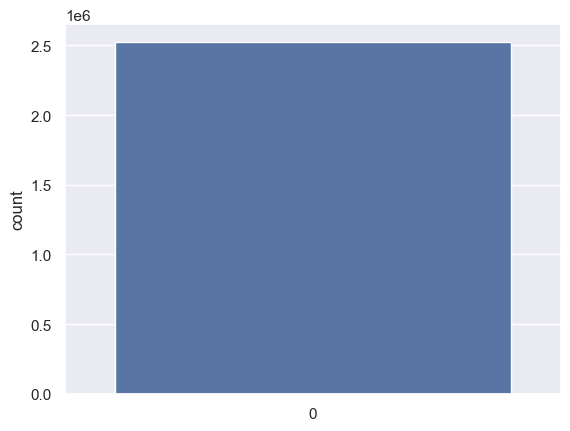

In [6]:
sns.countplot(train_ads['sex'])
plt.show()

Text(0.5, 1.0, 'sex')

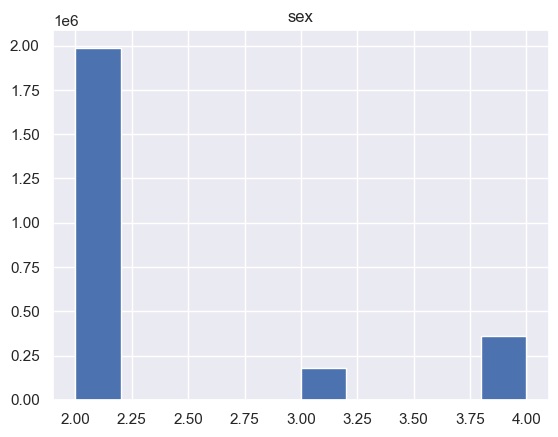

In [9]:
plt.hist(train_ads['sex'])
plt.title('sex')

Text(0.5, 1.0, 'age')

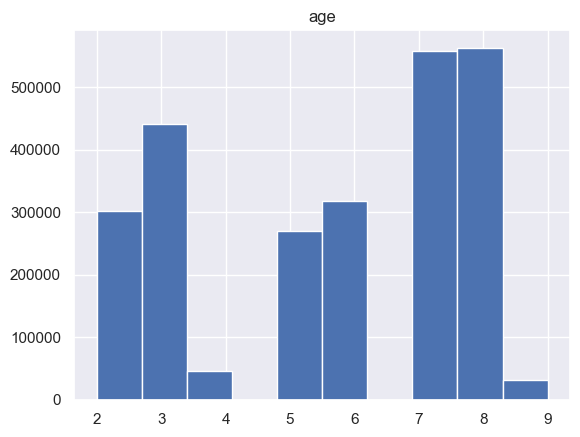

In [12]:
plt.hist(train_ads['age'])
plt.title('age')

Text(0.5, 1.0, 'task_id')

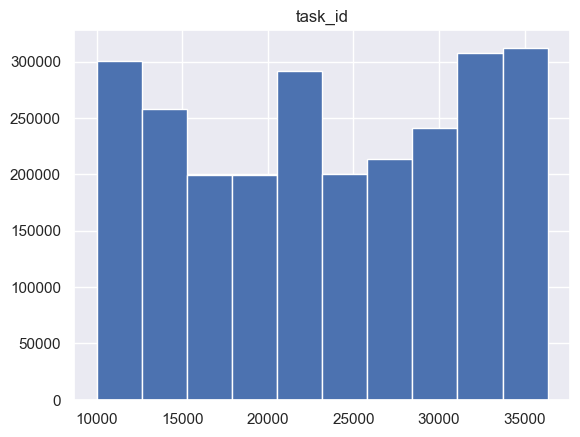

In [20]:
plt.hist(train_ads['task_id'])
plt.title('task_id')

In [7]:
counts = Counter(train_ads['task_id'])
print(counts)
counts = Counter(train_ads['label'])
print(counts)
counts = Counter(train_ads['pt_d'])
print(counts)

Counter({22100: 50953, 14584: 43112, 34382: 35038, 34975: 29672, 31941: 26300, 34848: 22705, 10670: 22268, 14404: 20226, 31996: 17752, 27573: 15708, 10699: 15270, 10653: 14836, 10769: 14554, 20692: 14534, 22097: 14493, 35039: 14398, 13860: 13805, 32551: 13147, 21567: 12887, 17020: 12872, 30157: 12731, 29211: 12581, 21493: 12284, 34041: 11669, 33083: 11636, 33257: 10789, 32082: 10595, 12115: 10500, 26981: 10346, 31706: 10263, 24372: 9576, 23488: 9242, 24227: 9216, 35264: 8718, 16086: 8643, 15501: 8194, 32921: 8153, 17039: 8120, 23823: 8027, 32971: 7891, 34455: 7673, 26917: 7643, 13181: 7435, 21104: 7379, 29852: 7347, 28511: 7338, 26529: 7335, 11276: 7204, 27880: 7166, 28290: 6717, 30991: 6207, 28621: 6194, 11584: 6174, 10463: 6142, 11911: 6134, 33475: 6112, 24106: 6090, 12999: 6067, 35368: 6045, 22827: 5975, 11508: 5931, 31276: 5908, 19753: 5900, 25769: 5854, 26554: 5788, 22763: 5757, 10526: 5569, 22280: 5512, 35520: 5500, 13491: 5473, 32221: 5425, 29599: 5323, 33709: 5306, 32368: 5245,

Text(0.5, 1.0, 'label')

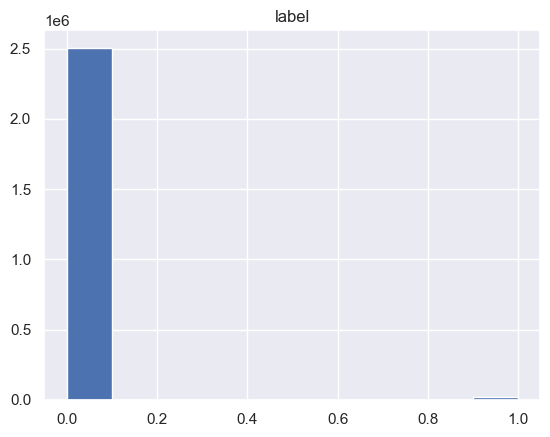

In [13]:
plt.hist(train_ads['label'])
plt.title('label')

d:\Users\76678\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\76678\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\76678\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\76678\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='slot_id', ylabel='count'>

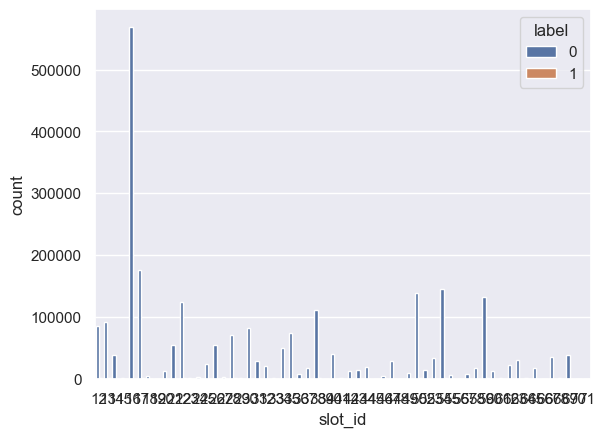

In [28]:
sns.countplot(x = "slot_id", hue = "label", data = train_ads)

d:\Users\76678\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\76678\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\76678\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
d:\Users\76678\anaconda3\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_cat

<Axes: xlabel='sex', ylabel='count'>

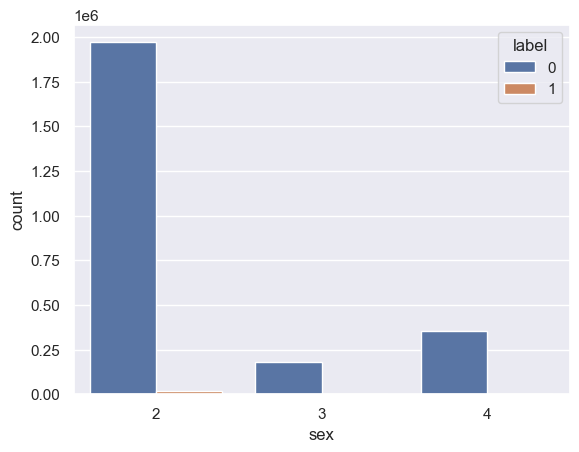

In [5]:
sns.countplot(x = "sex", hue = "label", data = train_ads)

In [38]:
# train_ads.label.value_counts()
# train_ads.sex.value_counts()
# train_ads.slot_id.value_counts()
# train_ads.log_id.value_counts()
# train_ads.user_id.value_counts()
# train_ads.series_dev.value_counts()
# train_ads.ad_click_list_v001.value_counts()
# train_ads.pt_d.value_counts()
# train_ads.app_score.value_counts()
train_ads.adv_id.value_counts()

adv_id
18060    50953
17683    43112
11752    35038
15769    29672
21695    26300
         ...  
18418        1
21308        1
12406        1
21753        1
12786        1
Name: count, Length: 10254, dtype: int64